## Visualizing Embeddings Using TSNE

This notebook demostrates visualization of embeddings using TSNE.
We will use the embedings we trained in the "Training_embeddings_using_gensim.ipnb notebook. We are using the word2vec_cbow model. 

In [1]:
# FOR GOOGLE COLAB USERS
# upload the "word2vec.bin" file in form the repository which can be found in the same folder as this notebook.
try:
    from google.colab import files
    uploaded = files.upload()
except ModuleNotFoundError:
    print("Not using colab")

In [2]:
from gensim.models import Word2Vec, KeyedVectors #To load the model
import warnings
warnings.filterwarnings('ignore') #ignore any generated warnings

import numpy as np
import matplotlib.pyplot as plt #to generate the t-SNE plot
from sklearn.manifold import TSNE #scikit learn's TSNE 

import os

import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

In [3]:
# load model
cwd=os.getcwd() 
model = KeyedVectors.load_word2vec_format(cwd+'\Models\word2vec_cbow.bin', binary=True)

## TSNE
t-SNE stands for t-distributed Stochastic Neighbouring Entities. Its a technique used for visualizing high dimensional data by reducing it to a 2 or 3 dimensions.
 

In [4]:
#Preprocessing our models vocabulary to make better visualizations

words_vocab= list(model.wv.vocab)#all the words in the vocabulary. 
print("Size of Vocabulary:",len(words_vocab))
print("Few words in Vocabulary",words_vocab[:50])

#Let us remove the stop words from this it will help making the visualization cleaner
stopwords_en = stopwords.words()
words_vocab_without_sw = [word.lower() for word in words_vocab if not word in stopwords_en]
print("Size of Vocabulary without stopwords:",len(words_vocab_without_sw))
print("Few words in Vocabulary without stopwords",words_vocab_without_sw[:30])
#The size didnt reduce much after removing the stop words so lets try visualizing only a selected subset of words

Size of Vocabulary: 161018
Few words in Vocabulary ['the', 'of', 'and', 'in', 'to', 'was', 'is', 'for', 'on', 'as', 'by', 'with', 'he', 'at', 'from', 'that', 'his', 'it', 'an', 'were', 'are', 'also', 'which', 'or', 'this', 'first', 'new', 'be', 'has', 'one', 'had', 'after', 'who', 'their', 'not', 'its', 'but', 'two', 'her', 'they', 'th', 'she', 'school', 'references', 'time', 'have', 'all', 'other', 'when', 'been']
Size of Vocabulary without stopwords: 159749
Few words in Vocabulary without stopwords ['first', 'new', 'two', 'th', 'school', 'references', 'time', 'year', 'bar', 'links', 'external', 'world', 'city', 'state', 'may', 'years', 'national', 'university', 'united', 'team', 'three', 'later', 'american', 'text', 'st', 'born', 'season', 'film', 'would', 'used']


In [5]:
#With the increase in the amount of data, it becomes more and more difficult to visualize and interpret
#In practice, similar words are combined into groups for further visualization.

keys = ['school', 'year', 'college', 'city', 'states', 'university', 'team', 'film']
embedding_clusters = []
word_clusters = []

for word in keys:
    embeddings = []
    words = []
    for similar_word, _ in model.most_similar(word, topn=30):
        words.append(similar_word)
        embeddings.append(model[similar_word])
    embedding_clusters.append(embeddings)#apending access vector of all similar words
    word_clusters.append(words)#appending list of all smiliar words

In [6]:
print("Embedding clusters:",embedding_clusters[0][0])#Access vector of the first word only
print("Word Clousters:",word_clusters[:2])

Embedding clusters: [-2.0008528  -1.3943557   1.4382704   0.8446866  -2.6626322   4.434941
 -2.874781    0.07160501  2.7645476   1.3397316  -1.5362843   1.9484733
 -1.538581    2.8054123  -0.1651442  -2.2072346  -1.2407984  -0.37212235
  1.7854097   1.51354     0.4680834  -6.1942625   2.0242858  -3.7782066
  0.57537895 -3.029885   -2.5517325  -2.4161081  -0.49409848  3.473683
  0.17055503 -3.9063861   3.884543    1.5628031  -2.2993872   2.1060982
 -3.3538942  -2.4706185   1.1629843  -0.9444056   1.4299889   0.32925856
  3.2923906  -0.6086113  -0.42672086  1.1591744  -3.224612    0.6084651
  2.366192    2.6875043   1.3349053  -3.0747583  -2.503866    1.5077431
 -1.024039    1.5941241   0.7730264  -0.42380166 -0.56361014  1.6036558
  1.9689867  -2.8361151   0.25759864 -5.638323    1.436891   -0.14189413
 -4.712218   -2.0199313  -0.9636327   3.3833733  -1.5988349   0.37275377
 -2.4628592  -1.6039482   0.21491958 -1.4248031  -1.4473001  -3.5625575
 -0.19743128  1.3642663   1.2659378  -2.61

In [7]:
from sklearn.manifold import TSNE
import numpy as np

embedding_clusters = np.array(embedding_clusters)
n, m, k = embedding_clusters.shape #geting the dimensions
tsne_model_en_2d = TSNE(perplexity=5, n_components=2, init='pca', n_iter=1500, random_state=2020) 
embeddings_en_2d = np.array(tsne_model_en_2d.fit_transform(embedding_clusters.reshape(n * m, k))).reshape(n, m, 2) #reshaping it into 2d so we can visualize it

### Hyperparameters of TSNE

1. n_components: The number of components, i.e., the dimension of the value space
2. perplexity: The number of effective neighbours
3. n_iter: Maximum number of iterations for the optimization.
4. init: Initialization of embedding.

t-SNE requires good amount of hyperparameter tuning to give effective results. More details on the hyperparameters can be found in the official [docs](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html). It is very easy to misread tsne too. This [article](https://distill.pub/2016/misread-tsne/) provides more deatils about it.

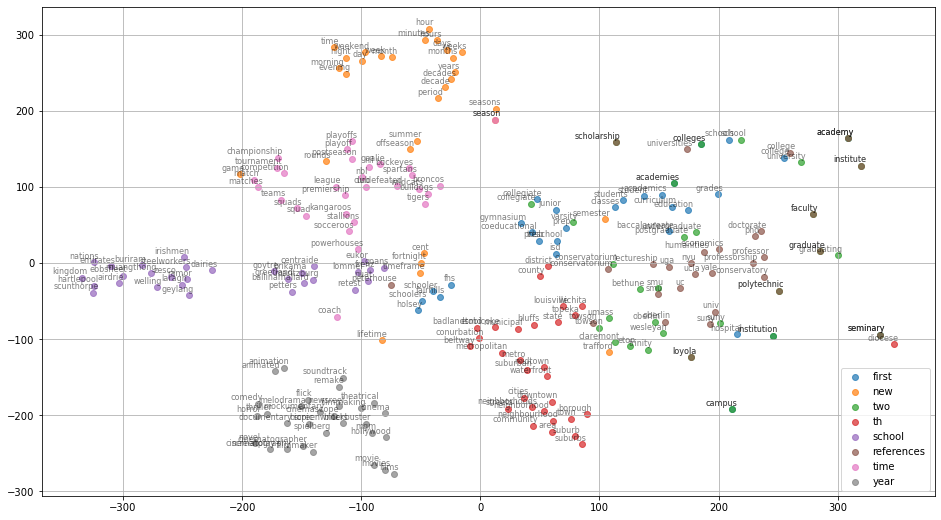

In [8]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
%matplotlib inline  

#script for constructing two-dimensional graphics using Matplotlib
def tsne_plot_similar_words(labels, embedding_clusters, word_clusters, a=0.7):
    plt.figure(figsize=(16, 9))
    

    for label, embeddings, words in zip(labels, embedding_clusters, word_clusters):
        x = embeddings[:,0]
        y = embeddings[:,1]
        plt.scatter(x, y, alpha=a, label=label)
        for i, word in enumerate(words):
            plt.annotate(word, alpha=0.5, xy=(x[i], y[i]), xytext=(5, 2), 
                         textcoords='offset points', ha='right', va='bottom', size=8)
    plt.legend(loc=4)
    plt.grid(True)
    plt.show()

tsne_plot_similar_words(words_vocab_without_sw, embeddings_en_2d, word_clusters)

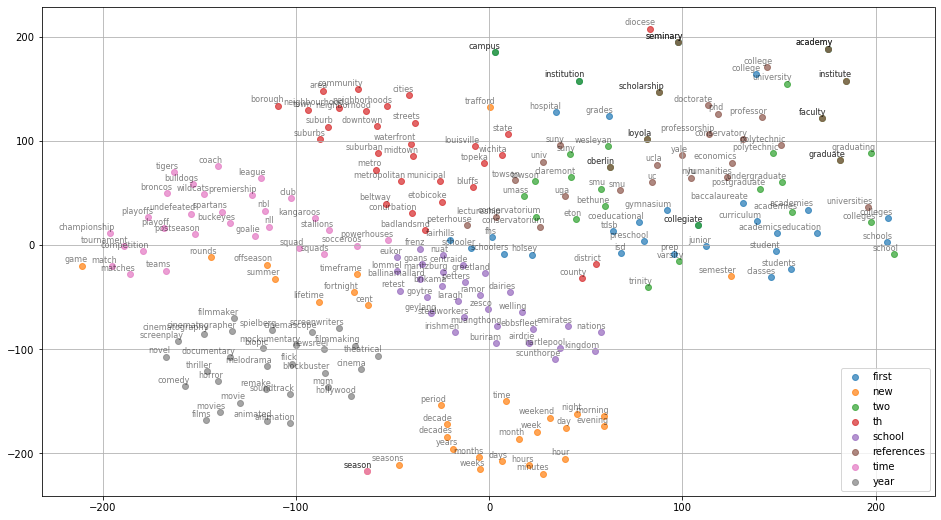

In [9]:
tsne_model_en_2d = TSNE(perplexity=25, n_components=2, init='pca', n_iter=1500, random_state=2020) 
embeddings_en_2d = np.array(tsne_model_en_2d.fit_transform(embedding_clusters.reshape(n * m, k))).reshape(n, m, 2)
tsne_plot_similar_words(words_vocab_without_sw, embeddings_en_2d, word_clusters)

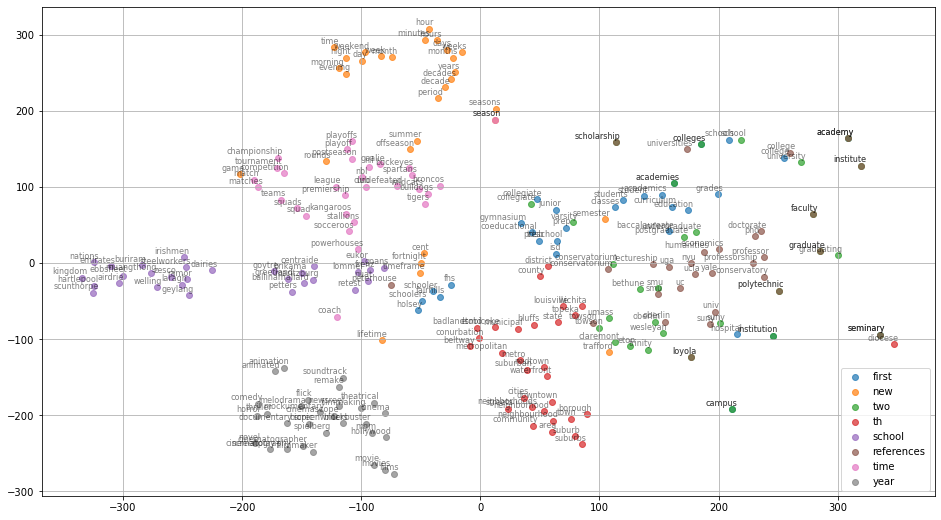

In [10]:
tsne_model_en_2d = TSNE(perplexity=5, n_components=2, init='pca', n_iter=1500, random_state=2020) 
embeddings_en_2d = np.array(tsne_model_en_2d.fit_transform(embedding_clusters.reshape(n * m, k))).reshape(n, m, 2)
tsne_plot_similar_words(words_vocab_without_sw, embeddings_en_2d, word_clusters)

Take a look at the above 3 graphs. We cannto say a higher or lower perplexity is good. It depends on the problem at hand. Here the plots of perplexity 5,10 are much better defined than the one with 25